> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset contain 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment and a number of characteristics about the patients who make the appointments. The variables of the dataset:

#### Column	Description
- PatientId:	Identification of a patient
- AppointmentID:	Identification of each appointment
- Gender:	Male or Female.
- ScheduledDay:	The day someone called or registered the appointment.
- AppointmentDay:	The day of the actuall appointment, when they have to visit the doctor.
- Age:	How old is the patient.
- Neighbourhood:	Where the appointment takes place.
- Scholarship:	True of False
- Hipertension:	True or False
- Diabetes:	True or False
- Alcoholism:	True or False
- Handcap:	True or False
- SMS_received:	messages sent to the patient.
- No-show:	True or False 


### Question(s) for Analysis


- Q1- Is there a correlation between missing the appointment and the age of the patient?

- Q2- Is there a correlation between missing the appointment and not receiving an SMS message?

In [7]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("---Importing Done!!---")
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


---Importing Done!!---


In [15]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
    Running setup.py install for pandas: started


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\23480\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Windows\\Temp\\pip-install-263ggf5t\\pandas_4769bd26d49941148e888cbe88bb52dc\\setup.py'"'"'; __file__='"'"'C:\\Windows\\Temp\\pip-install-263ggf5t\\pandas_4769bd26d49941148e888cbe88bb52dc\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Windows\Temp\pip-wheel-g_008aw6'
       cwd: C:\Windows\Temp\pip-install-263ggf5t\pandas_4769bd26d49941148e888cbe88bb52dc\
  Complete output (907 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\pandas
  copying pandas\conftest.py -> build\lib.w

    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\23480\anaconda3\lib\site-packages\pandas-1.4.2.dist-info\
   from C:\Users\23480\anaconda3\Lib\site-packages\~andas-1.4.2.dist-info
  Moving to c:\users\23480\anaconda3\lib\site-packages\pandas\
   from C:\Users\23480\anaconda3\Lib\site-packages\~andas


  copying pandas\tests\test_downstream.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_errors.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_expressions.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_join.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_lib.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_multilevel.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_nanops.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_optional_dependency.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_register_accessor.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_sorting.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_strings.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_take.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\__init__.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [40]:
# Load your data and print out a few lines. Perform operations to inspect data
#  types and look for instances of missing or possibly errant data.
df=pd.read_csv('may2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [41]:
#dsiplaying the properties of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has two columns with incorrect types

- ScheduledDay
- AppointmentDay
So, we wil convert them to datetime types

Also, 
- Hipertension and
- Handcap

are wrongly spelt

In [43]:
# Convert ScheduledDay str to datetime type
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.ScheduledDay.head(2)

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [104]:
# Convert ScheduledDay str to datetime type
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.AppointmentDay.head(2)

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [105]:
#checking the datetime conversion worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [106]:
#renaming the two columns wrongly spelled
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace = True)

In [107]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Age_bin10', 'missed'],
      dtype='object')

In [108]:
#describing the numberical columns in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,missed
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [109]:
#displaying the coulmn names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Age_bin10', 'missed'],
      dtype='object')

In [110]:
#dsiplaying the number of rows and columns in the dataset
df.shape

(110526, 16)

The dataset has:

- 110,527 record
- 14 column

In [111]:
#check the unique values present in each column
df.nunique()

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
Age_bin10             11
missed                 2
dtype: int64

In [112]:
#confirming dtypes ok
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
Age_bin10                    category
missed                          int32
dtype: object

In [113]:
#check for missing values
df.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
No-show              0
Age_bin10         3539
missed               0
dtype: int64

The dataset  has no missing values

In [114]:
#pd.plotting.scatter_matrix(df,figsize=(25,5))


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [115]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,missed
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


- The columns: - Age has an incorrect value -1
               - Handcap has max value of 4
 - Let us check it

In [116]:
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

Remove Age value = -1

In [117]:
#removing the age value less than 0
mask=~df['Age'] < 0 
df[mask]
df=df[mask]

In [118]:
#checking for incorrect value in age column
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [119]:
#inspecting handIcap columns
df.Handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

By doing some research on the dataset page:

- Question regarding to Handcap : https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699

 "... the handicap refers to the number of desabilites a person has.For example, if the person is blind and can't walk the total is 2."


In [120]:
#checking for duplicated values
df.duplicated().sum()

0

Cleaning and evaluating the results:

- There are 110,527 records in the dataset, with 14 columns. After removing an entry from the 'Age' column, we now have: 10,5276 records and 14 columns.

- The datetime data type was required for the data columns (ScheduledDay, AppointmentDay).

- In the dataset, there were no missing values.

- We removed the row that included the Age column since one of its values was equal to -1.

- The Handcap column contains more than two values, and we discovered via investigation that it corresponds to a person's number of impairments.

- There are no duplicate rows in the dataset.

<a id='eda'></a>
## Exploratory Data Analysis


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

# The ratio between males and females

In [122]:
df.Gender.value_counts(normalize=True)

F    0.649974
M    0.350026
Name: Gender, dtype: float64

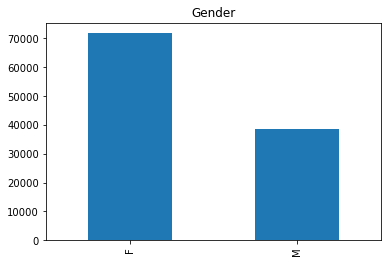

In [123]:
df.Gender.value_counts().plot(kind="bar")
plt.title("Gender");

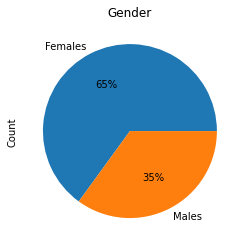

In [124]:
df["Gender"].value_counts().plot(kind="pie",labels=["Females","Males"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("Gender");

In [125]:
print("The females to males ratio : (",(df.Gender == "F").sum() ,":", (df.Gender == "M").sum() ,") -> ", round((df.Gender == "F").sum() / (df.Gender == "M").sum(),2),sep="" )

The females to males ratio : (71839:38687) -> 1.86


Females outnumber males by a significant margin (the number of females is near twice the number of men)

Text(0.5, 1.0, "'ScheduledDay' Histogram")

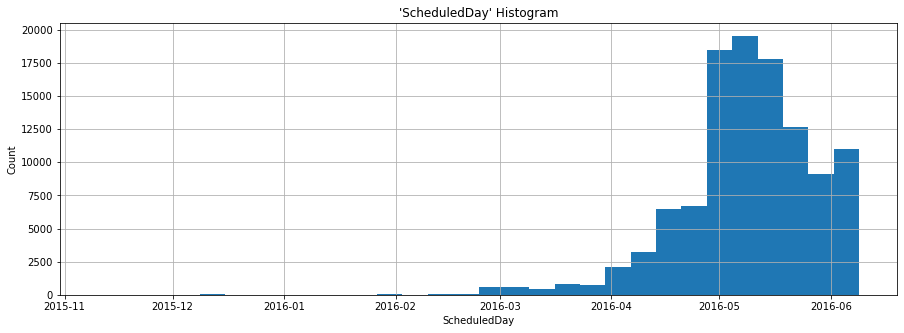

In [126]:
# histogram plot for 'ScheduledDay'
df.ScheduledDay.hist(bins=30,figsize=(15,5));
plt.xlabel("ScheduledDay")
plt.ylabel("Count")
plt.title("'ScheduledDay' Histogram")

Text(0.5, 1.0, "'ScheduledDay' Line chart")

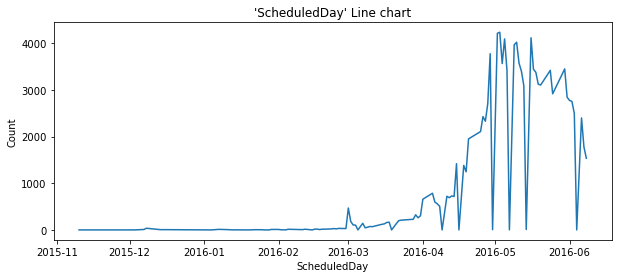

In [127]:
# line chart plot for 'ScheduledDay'
df.ScheduledDay.dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("ScheduledDay")
plt.ylabel("Count")
plt.title("'ScheduledDay' Line chart")

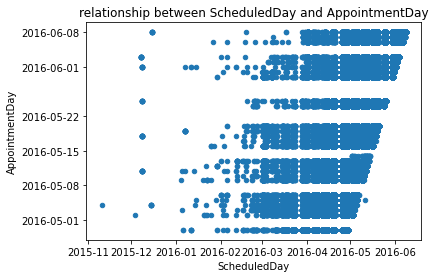

In [128]:
# Scatter plot for the relationship between ScheduledDay and AppointmentDay
df.plot(kind="scatter", x="ScheduledDay",y="AppointmentDay");
plt.title("relationship between ScheduledDay and AppointmentDay");

Text(0.5, 1.0, "'AppointmentDay' Line chart")

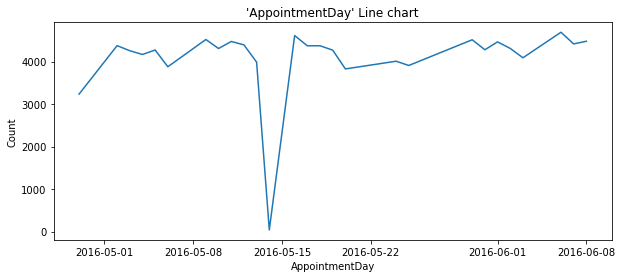

In [129]:
# line chart plot for 'ScheduledDay'
df.AppointmentDay.dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("AppointmentDay")
plt.ylabel("Count")
plt.title("'AppointmentDay' Line chart")

# Age Exploration

In [69]:
#Age description
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

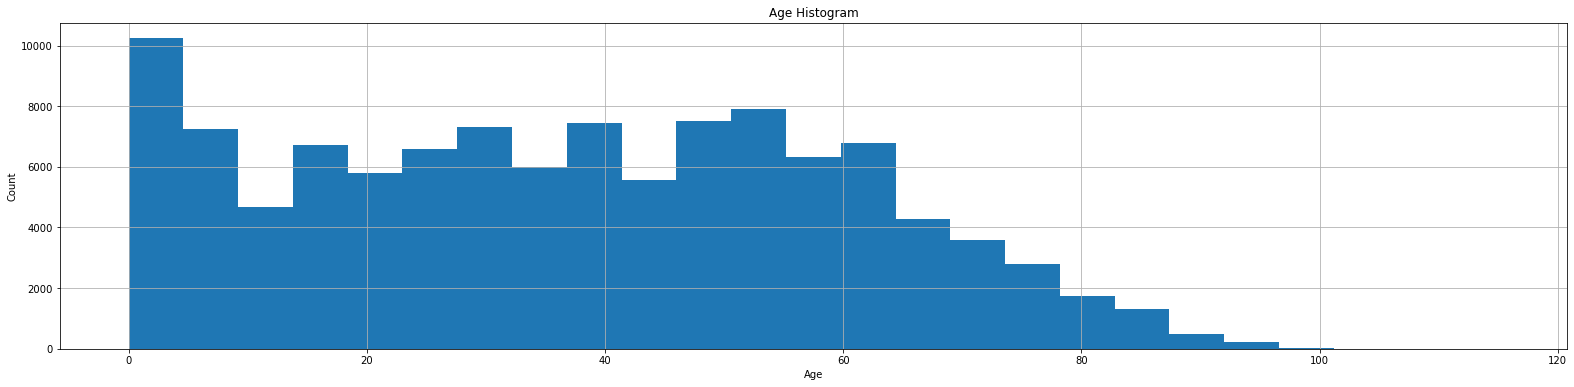

In [70]:
# Histogram plot of Age
df.Age.hist(bins=25,figsize=(27,6)) 
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.title("Age Histogram");

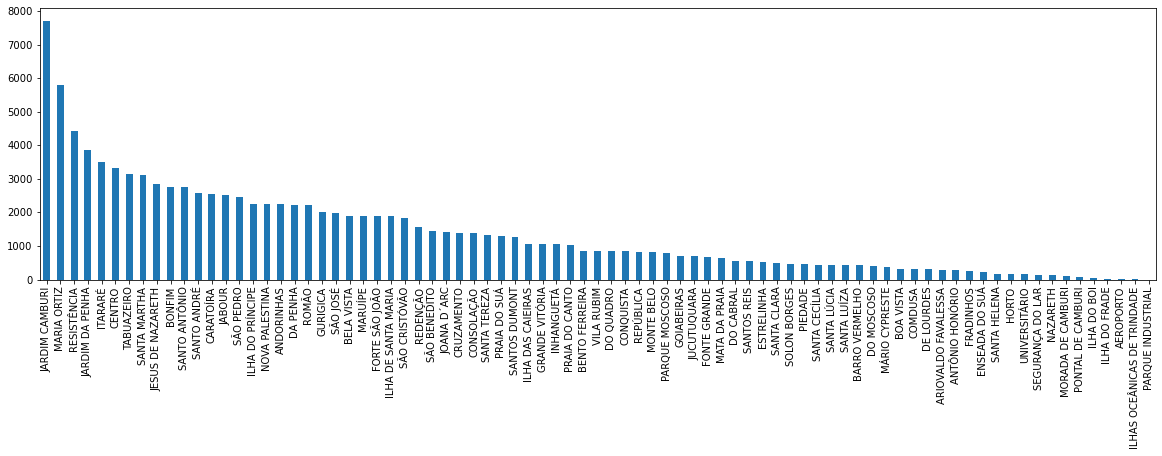

In [71]:
#neighbourhood description
df.Neighbourhood.value_counts().plot(kind="bar",figsize=(20,5));

In [72]:
# function to find the value counts percentage and plot barplot figure
def percent_and_barplot(col):
    print(round(df[col].value_counts()/len(df)*100,2))
    df[col].value_counts().plot(kind="bar")
    plt.ylabel("Count")
    plt.title(col);

0    90.17
1     9.83
Name: Scholarship, dtype: float64


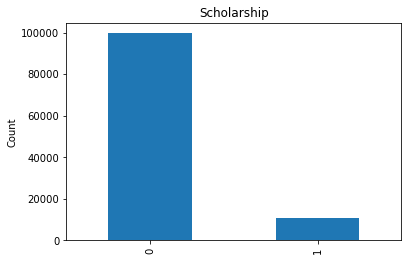

In [73]:
percent_and_barplot("Scholarship")

0    80.28
1    19.72
Name: Hypertension, dtype: float64


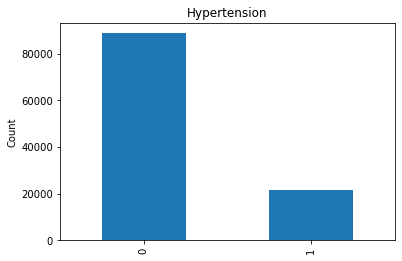

In [74]:
percent_and_barplot("Hypertension")

0    96.96
1     3.04
Name: Alcoholism, dtype: float64


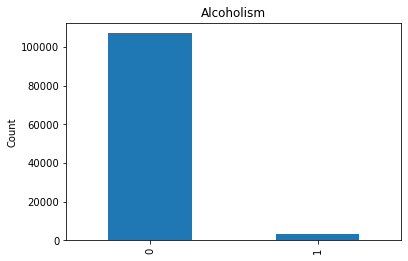

In [75]:
percent_and_barplot("Alcoholism");

0    92.81
1     7.19
Name: Diabetes, dtype: float64


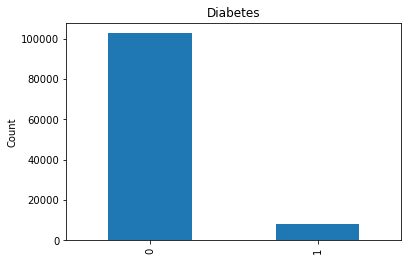

In [76]:
percent_and_barplot("Diabetes");

0    97.97
1     1.85
2     0.17
3     0.01
4     0.00
Name: Handicap, dtype: float64


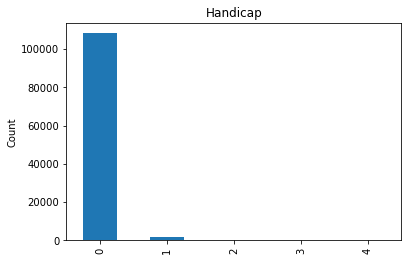

In [77]:
percent_and_barplot("Handicap");

0    67.9
1    32.1
Name: SMS_received, dtype: float64


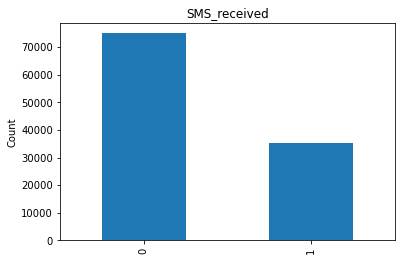

In [78]:
percent_and_barplot("SMS_received");

No     79.81
Yes    20.19
Name: No-show, dtype: float64


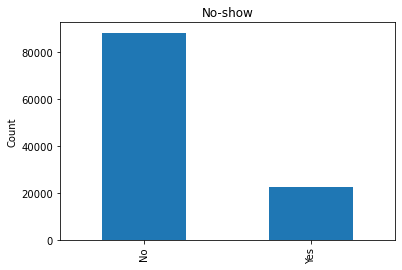

In [79]:
percent_and_barplot("No-show");

Exploratory Data analysis Results:
- The proportion of females is greater than that of males.
- The period of time is starting from 2015-11-10 for scheduling dates and from 2016-04-29 for appointments untill -> 2016-06-08.
- The Age range is contain nearly all ages (from 0 to 115) and the majority is in very young age and between 20 and 55.
- There is 81 neighbourhood where the appointment takes place.
- Most of the patients have No : Scholarship 90% , Hipertension 80%, Diabetes 93% , Alcoholism 97% , Handcap 98% (('according to the data')).
- 68% of patients did not received SMS.

- Nearly 20% of patient missed their appointment.

### Q1- Is there a correlation between missing the appointment and the age of the patient?

In [80]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  object             
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [81]:
# making masks to use later
miss = df["No-show"] == "Yes"
show = df["No-show"] == "No"

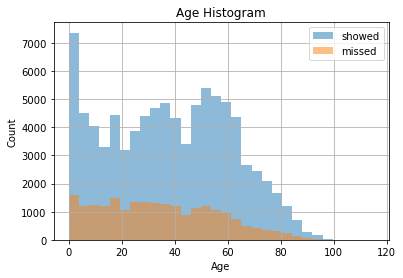

In [82]:
# histogram for ages of patients
df[show].Age.hist(alpha=0.5, bins=30,label="showed")
df[miss].Age.hist(alpha=0.5, bins=30,label="missed")
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

In [83]:
# value counts for no-show grouped by Age
Age_count = df.groupby("Age")["No-show"].value_counts()
Age_count

Age  No-show
0    No         2900
     Yes         639
1    No         1858
     Yes         415
2    No         1366
                ... 
99   No            1
100  No            4
102  No            2
115  Yes           3
     No            2
Name: No-show, Length: 203, dtype: int64

In [84]:
# value counts for Age
Age_count.groupby(level=0).sum()

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: No-show, Length: 103, dtype: int64

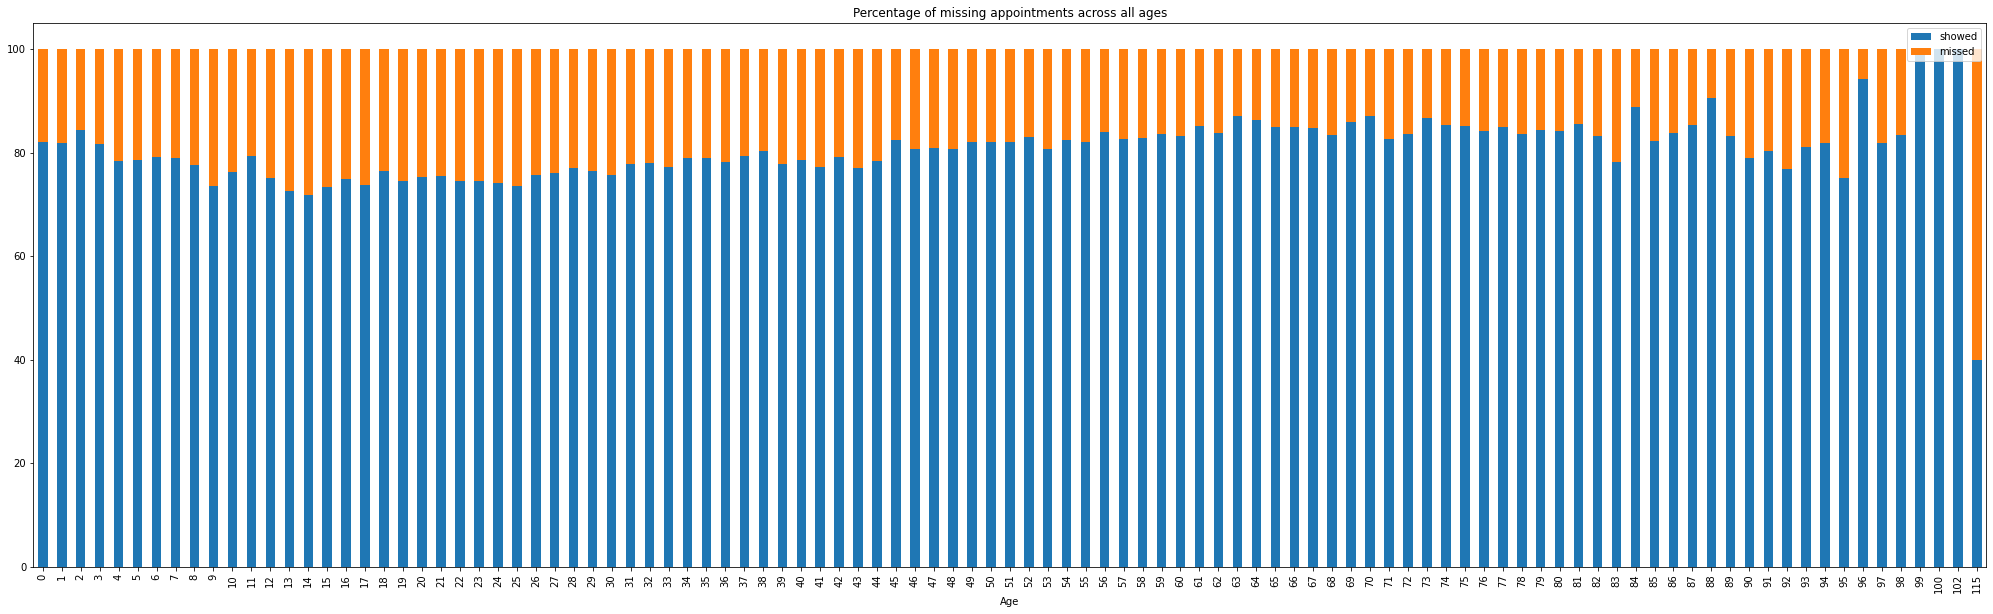

In [85]:
# Stacked bar plot for the patients who missed thier appointment across all ages
round(Age_count / Age_count.groupby(level=0).sum() * 100,2).unstack().plot(kind="bar",stacked=True, figsize=(35,10));
plt.legend(["showed","missed"]);
plt.title("Percentage of missing appointments across all ages");

In [86]:
# The mean value of percentage of age for patient that missing thier appointment
print("The mean value of patient missig the appointment for the age:")
round(Age_count / Age_count.groupby(level=0).sum() * 100,2).unstack().Yes.mean()

The mean value of patient missig the appointment for the age:


19.850300000000008

In [87]:
#binning the ages
bins=[0,10,20,30,40,50,60,70,80,90,100,120]
df["Age_bin10"] = pd.cut(df.Age, bins=bins)
Age10_count = df.groupby("Age_bin10")["No-show"].value_counts()

Text(0.5, 1.0, 'Percentage of Missing appointment across ages')

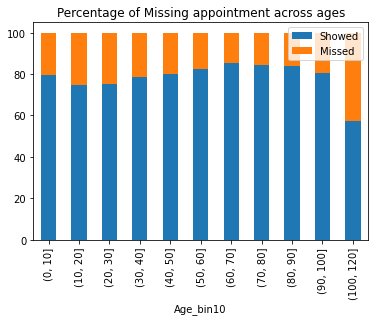

In [88]:
#plot percentage of missing appointments across ages
(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True)
plt.legend(["Showed","Missed"]);
plt.title("Percentage of Missing appointment across ages")

In [89]:
(Age10_count/Age10_count.groupby(level=0).sum()*100)

Age_bin10   No-show
(0, 10]     No         79.296515
            Yes        20.703485
(10, 20]    No         74.746164
            Yes        25.253836
(20, 30]    No         75.375463
            Yes        24.624537
(30, 40]    No         78.527770
            Yes        21.472230
(40, 50]    No         80.097087
            Yes        19.902913
(50, 60]    No         82.625631
            Yes        17.374369
(60, 70]    No         85.271249
            Yes        14.728751
(70, 80]    No         84.460759
            Yes        15.539241
(80, 90]    No         84.001572
            Yes        15.998428
(90, 100]   No         80.398671
            Yes        19.601329
(100, 120]  No         57.142857
            Yes        42.857143
Name: No-show, dtype: float64

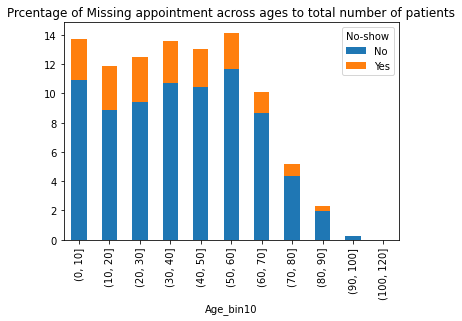

In [90]:
# ratio to all patients
(Age10_count/len(df)*100).unstack().plot(kind="bar",stacked=True);
plt.title("Prcentage of Missing appointment across ages to total number of patients");

In [91]:
(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().mean()

No-show
No     78.358522
Yes    21.641478
dtype: float64

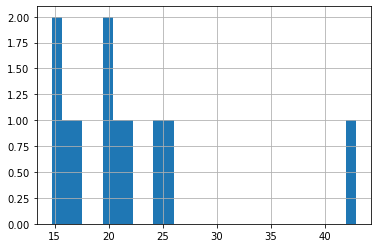

In [92]:
(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().Yes.hist(bins=30);

Results:
- There is no strong corolation between age alone and missing the appointment :

- The mean of patient missing an appointment across all ages (19.85%) is close to the overall avarge (20.19%)

After some exploration we could say:
- patients from 12 to mid 30s are more likely to miss their appointments
kids and patients in their 60s, 70s and 80s are more likely to show to their appointments : The reason for that could be because there is someone who is taking them to their appointments.

#  Q2- Is there a correlation between missing the appointment and not receiving an SMS message?

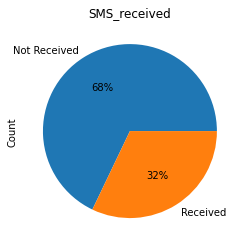

In [93]:
#show percentage of sms sent grouped by not received and received
df["SMS_received"].value_counts().plot(kind="pie",labels=["Not Received","Received"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("SMS_received");

In [94]:
#count of no-show grouped by sms_received
SMS_count = df.groupby("SMS_received")["No-show"].value_counts()
SMS_count

SMS_received  No-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

In [95]:

SMS_NR = (SMS_count / SMS_count.groupby(level=0).sum() * 100).unstack()
SMS_NR.index = ["Not Received", "Received"]
SMS_NR

No-show,No,Yes
Not Received,83.296466,16.703534
Received,72.425455,27.574545


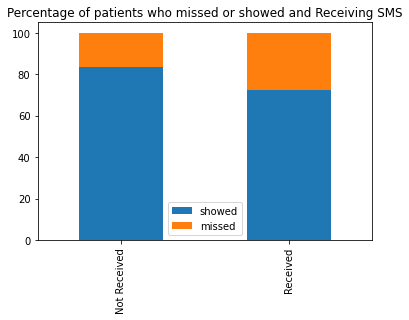

In [96]:
SMS_NR.plot(kind="bar",stacked=True)
plt.legend(["showed","missed"])
plt.title("Percentage of patients who missed or showed and Receiving SMS");

In [97]:
# Convert "No-show" column to binary values by creatind a new column 
df["missed"] = np.where(df["No-show"] == "Yes",1,0)

In [98]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,missed
PatientId,1.000000,0.004023,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456
AppointmentID,0.004023,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,-0.162597
Age,-0.004121,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hypertension,-0.006436,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.001608,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.011014,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handicap,-0.007915,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,-0.009742,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
missed,-0.001456,-0.162597,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000



### Conclusions
We investigated the correlation between some of the characteristics of the patients and whether they missed or showed to their appointment. And these are the results of these analyses:
- Patients from 12 to mid-30s are more likely to miss their appointments
- Receiving an SMS did not increase the probabilty that a patient would keep their appointment.

### Limitations
- The period when the data collected was just nearly two months, and this short period doesn't make the data reliable to make a strong correlation
- There was no explanation of how the data was collected, and if it was collected in a way that makes these analyses more reliable.
- The Handcap and SMS_received columns weren't explained clearly on the dataset page.
- The dataset didn't explain why the patient comes to the doctor, which may give an additional explanation about why they miss their appointments.

In [135]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295